### Visualisation for Kurt POP 

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd

In [72]:
def read_as_dataframe(filename):
    
    d = {'Gamma': [], 'State': [], 'Method': [], 'Time': [], 'Fidelity': []}
    df = pd.DataFrame(data=d)
    
    with h5py.File(filename, "r") as f:
        gammas = ['0.079477', '0.25133', '0.79477',
                  '2.5133', '7.9477', '25.133', '79.477', '251.33']
        for gamma in gammas:
            init_states = f['gamma_'+gamma].keys()
            for state in init_states:
                methods = f['gamma_'+gamma][state].keys()
                for method in methods:
                    
                    fidelity = f['gamma_'+gamma][state][method][()]
                    ser_len = len(fidelity)
                    gamma_column = [gamma] * ser_len
                    state_column = [state] * ser_len
                    method_column = [method[9:]] * ser_len
                    time_column = range(0, ser_len)
                    
                    d_ser = {'Gamma': gamma_column,
                             'State': state_column,
                             'Method': method_column,
                             'Time': time_column, 
                             'Fidelity': fidelity}
            
                    df_ser = pd.DataFrame(data = d_ser)   
                    df = pd.concat([df, df_ser])
    return df

In [135]:
def line_and_violin_for_gamma(df, i):
    dfg = df[df['Gamma'] == gammas[i]]
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
    axes[0].set_title(' $\gamma$ = ' + gammas[i])
    sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg, style="Operators")
    sns.violinplot(ax=axes[1], data=dfg, x="Method", y="Fidelity")
    axes[1].set_xlabel('')
    axes[1].legend([],[], frameon=False)
    return axes[0], axes[1]

In [73]:
directory = "C:/Users/Zakhar/Documents/GitHub/JPOP_SID/DATA/"

Read data for different number of operators

In [122]:
df = pd.DataFrame(data = {'Ops_num':[],'Gamma': [], 'State': [], 
                          'Method': [], 'Time': [], 'Fidelity': []})

for ops_num in range(2,5):
   
    file_name \
    = "Kurt_POPSID_DODECA_ops" + str(ops_num) + "_fidelity_test_all_2022-Sep-27_at_08-47.h5"  
    
    df_op = read_as_dataframe(directory+file_name)
    df_op['Ops_num'] = str(ops_num)
    
    df = pd.concat([df, df_op])

In [123]:
df = df[df['Method'].isin(["simp", "kraus"])]
df = df[df['Ops_num'].isin(["2", "3"])]

df2 = df[df['Ops_num'] == "2"]
df3 = df[df['Ops_num'] == "3"]

df = df.rename(columns={"Ops_num": "Operators"})
df.replace(to_replace= 'simp', value = 'Lindblad', inplace=True )
df.replace(to_replace= 'kraus', value = 'Kraus', inplace=True )

gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

dfg1 = df[df['Gamma'] == gammas[0]]
dfg2 = df[df['Gamma'] == gammas[1]]
dfg3 = df[df['Gamma'] == gammas[2]]
dfg4 = df[df['Gamma'] == gammas[3]]
dfg5 = df[df['Gamma'] == gammas[4]]
dfg6 = df[df['Gamma'] == gammas[5]]
dfg7 = df[df['Gamma'] == gammas[6]]
dfg8 = df[df['Gamma'] == gammas[7]]


C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\4236829794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simp.replace(to_replace= '2', value = '1', inplace=True )
C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\4236829794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simp.replace(to_replace= '3', value = '2', inplace=True )
C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\4236829794.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


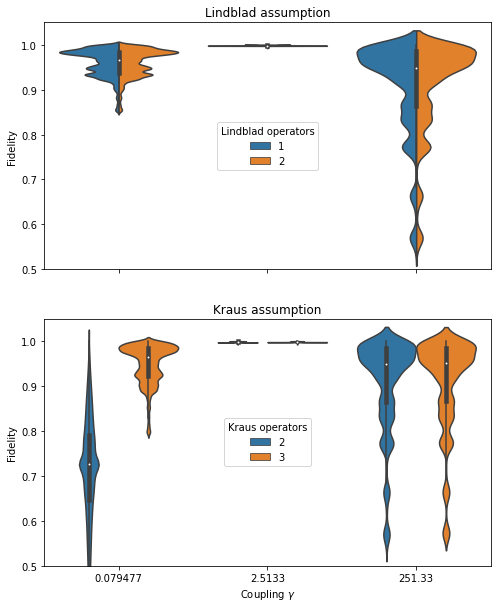

In [117]:
df_3gs = df[df['Gamma'].isin(['0.079477', '2.5133','251.33'])]

df_simp = df_3gs[df_3gs['Method']=="Lindblad"]
df_simp.replace(to_replace= '2', value = '1', inplace=True )
df_simp.replace(to_replace= '3', value = '2', inplace=True )

df_simp = df_simp.rename(columns={"Operators": "Lindblad operators"})

df_kraus = df_3gs[df_3gs['Method']=="Kraus"]

df_kraus = df_kraus.rename(columns={"Operators": "Kraus operators"})

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,10))
fig.suptitle('Fidelity for Lindblad and Kruas assumptions', fontsize = 14)
axes[0].set_title('Lindblad assumption')
axes[0].set_ylim([0.5, 1.05])

sns.violinplot(ax=axes[0], data=df_simp, x="Gamma", y="Fidelity", hue="Lindblad operators", split=True)
sns.move_legend(axes[0], 'center')
axes[0].set_xlabel('')

axes[1].set_title('Kraus assumption')
sns.violinplot(ax=axes[1], data=df_kraus, x="Gamma", y="Fidelity", hue="Kraus operators")
sns.move_legend(axes[1], 'center')
axes[1].set_xlabel(r'Coupling $\gamma$')
fig.show()

In [ ]:
df_simp = df[df['Method']=="Lindblad"]
df_simp.replace(to_replace= '2', value = '1', inplace=True )
df_simp.replace(to_replace= '3', value = '2', inplace=True )

df_simp = df_simp.rename(columns={"Operators": "Lindblad operators"})

df_krausA = df[df['Method']=="Kraus"]

df_kraus = df_kraus.rename(columns={"Operators": "Kraus operators"})

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8,10))
fig.suptitle('Fidelity for Lindblad and Kruas assumptions', fontsize = 14)
axes[0].set_title('Lindblad assumption')
axes[0].set_ylim([0.5, 1.05])

sns.violinplot(ax=axes[0], data=df_simp, x="Gamma", y="Fidelity", hue="Lindblad operators", split=True)
sns.move_legend(axes[0], 'center')
axes[0].set_xlabel('')

axes[1].set_title('Kraus assumption')
sns.violinplot(ax=axes[1], data=df_kraus, x="Gamma", y="Fidelity", hue="Kraus operators")
sns.move_legend(axes[1], 'center')
axes[1].set_xlabel(r'Coupling $\gamma$')
fig.show()

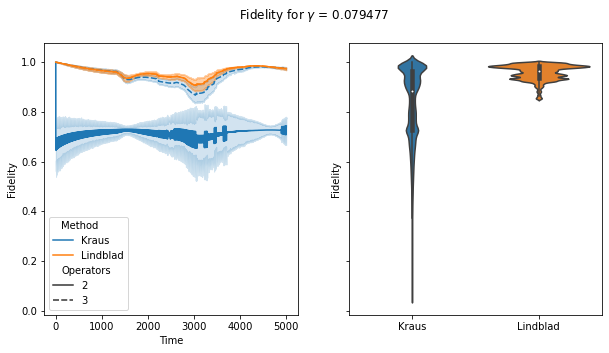

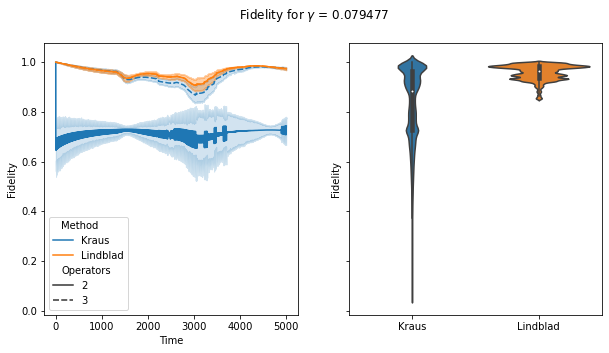

In [126]:
plot_line_and_violin_for_gamma(df, 0)

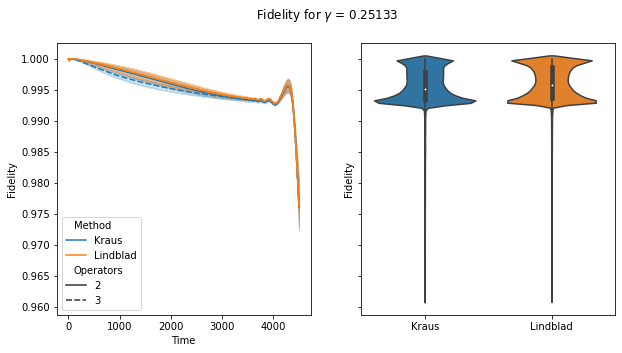

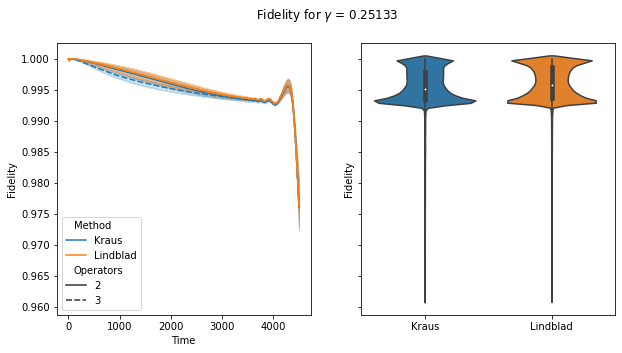

In [128]:
plot_line_and_violin_for_gamma(df, 1)

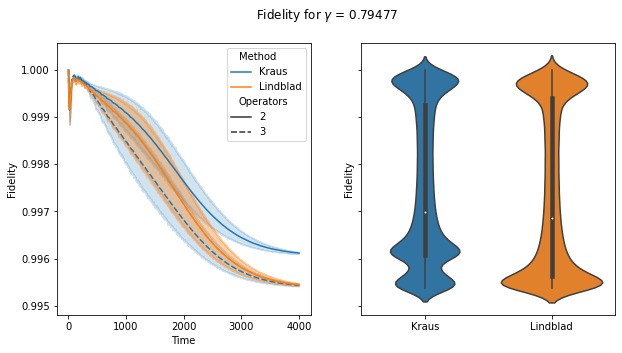

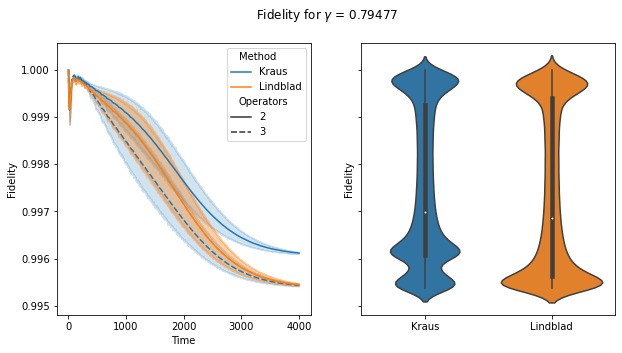

In [129]:
plot_line_and_violin_for_gamma(df, 2)

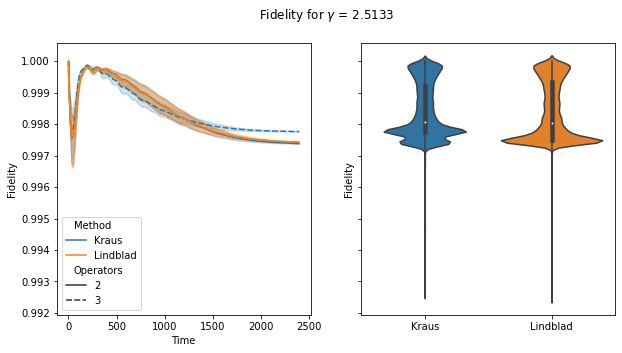

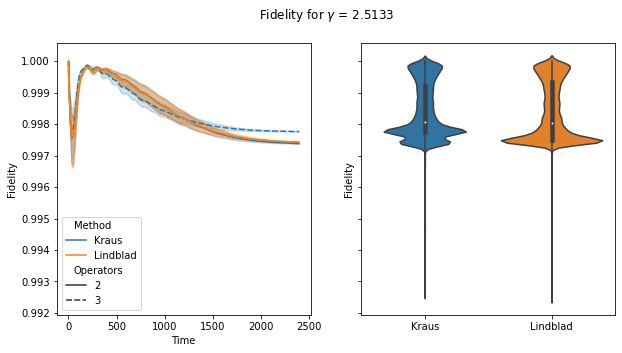

In [130]:
plot_line_and_violin_for_gamma(df, 3)

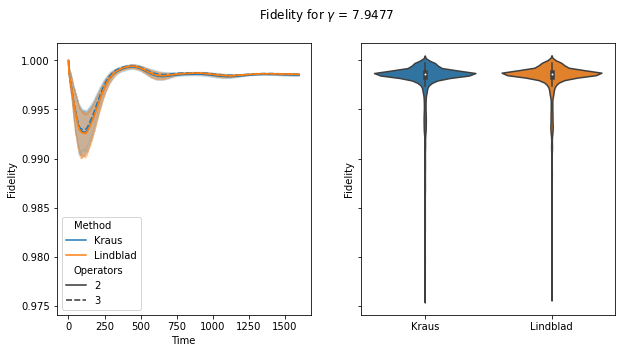

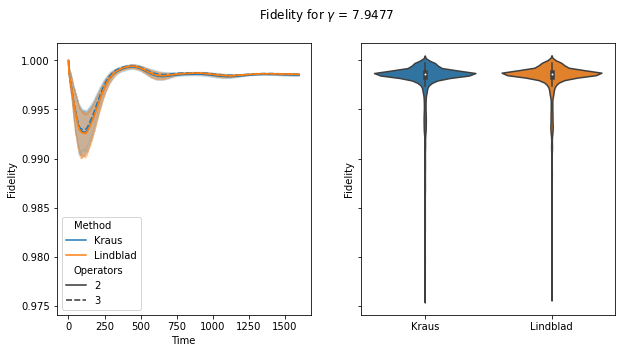

In [131]:
plot_line_and_violin_for_gamma(df, 4)

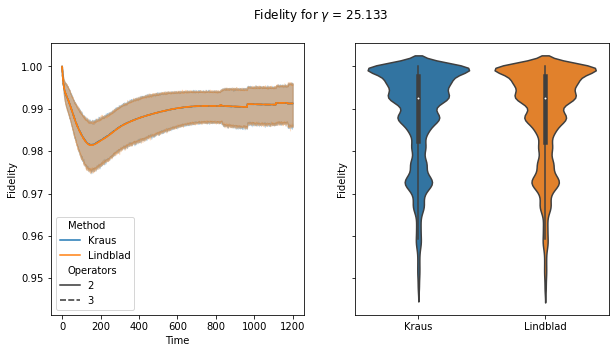

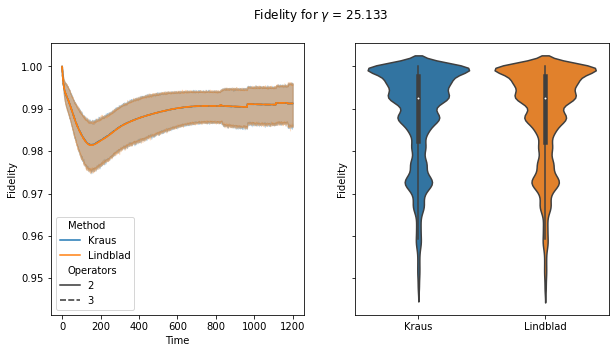

In [132]:
plot_line_and_violin_for_gamma(df, 5)

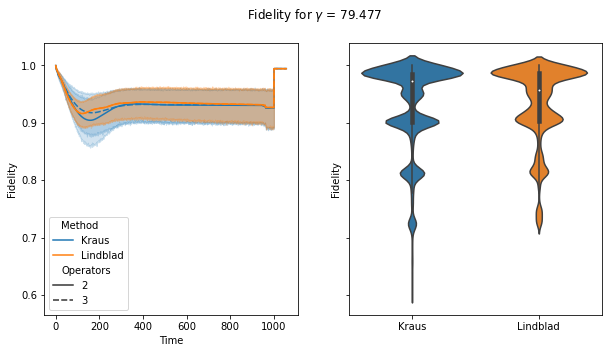

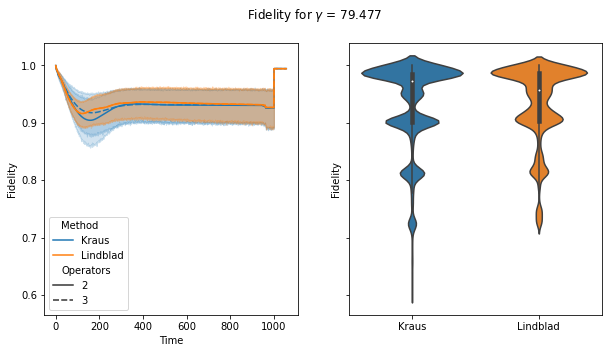

In [133]:
plot_line_and_violin_for_gamma(df, 6)

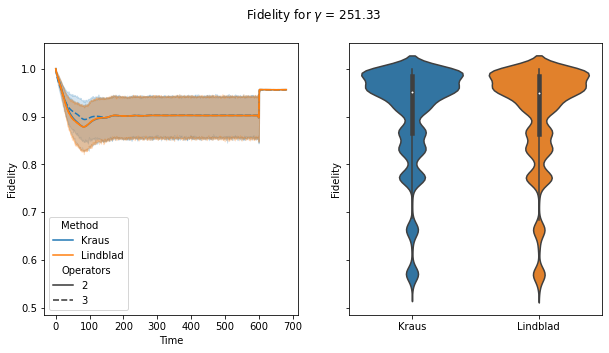

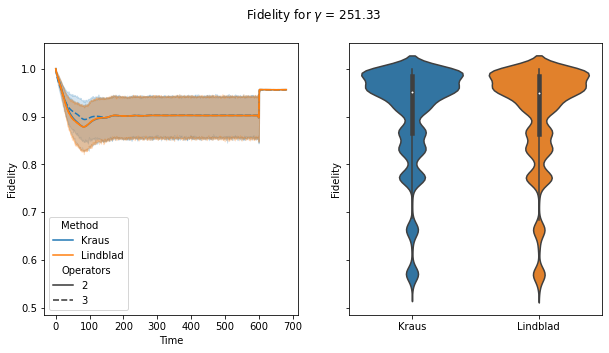

In [134]:
plot_line_and_violin_for_gamma(df, 7)

C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\1525749526.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


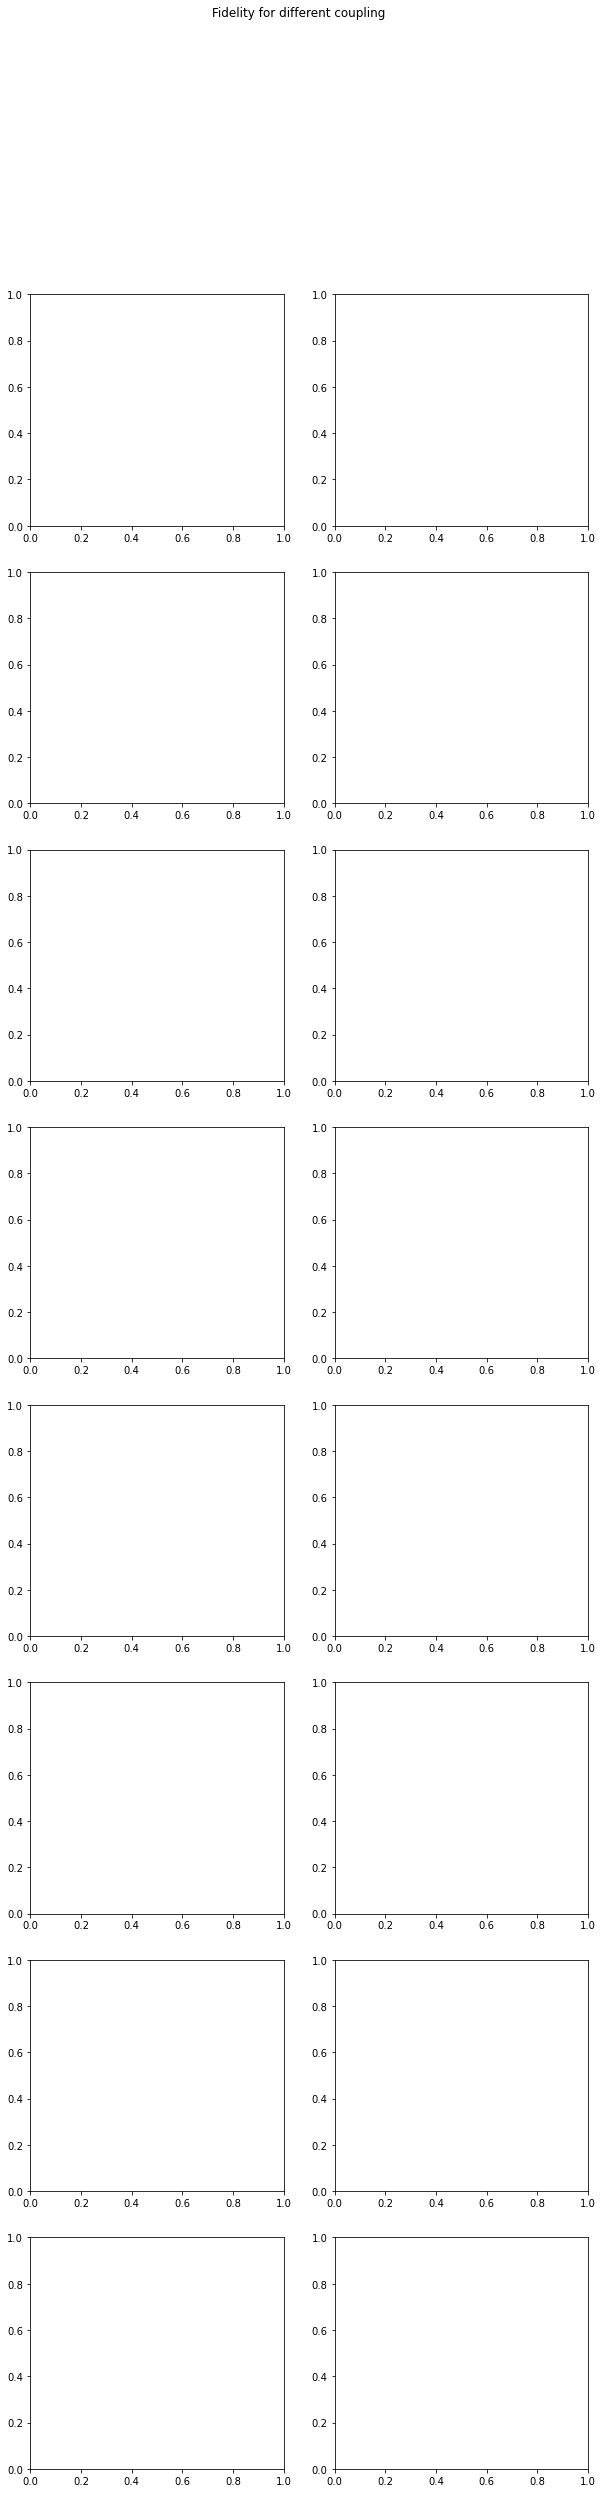

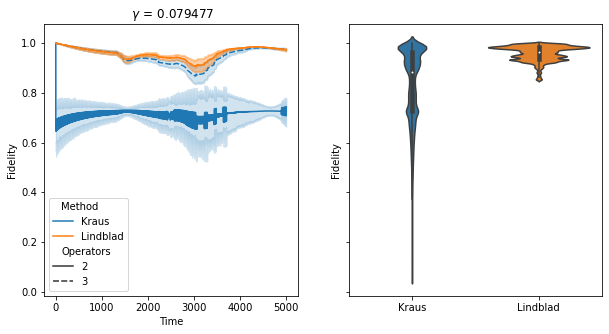

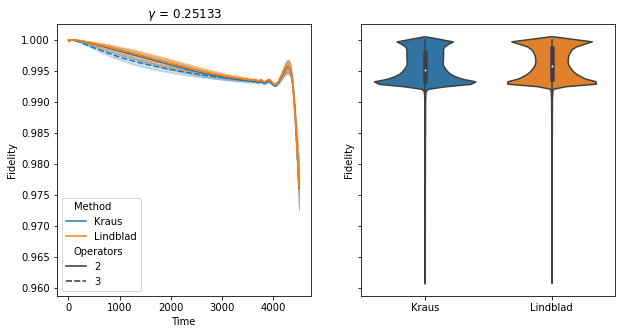

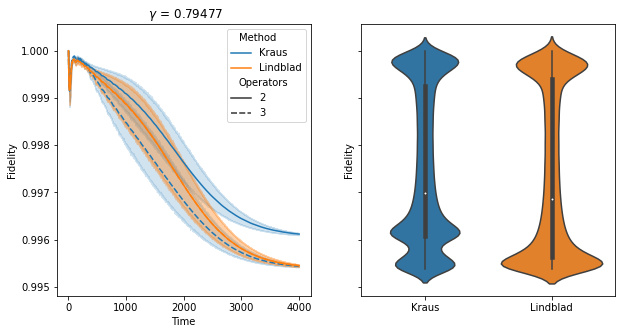

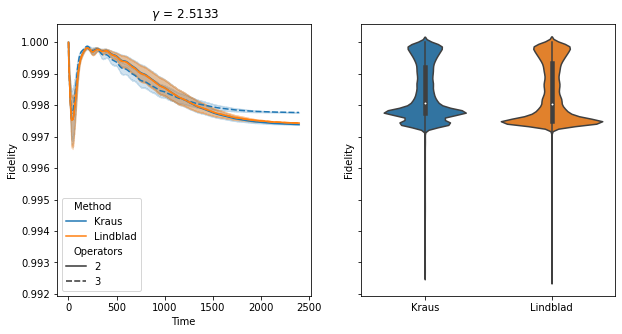

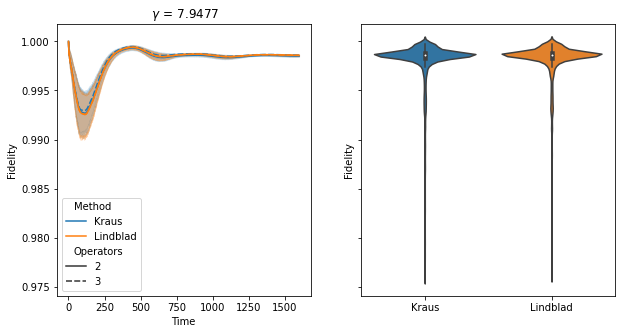

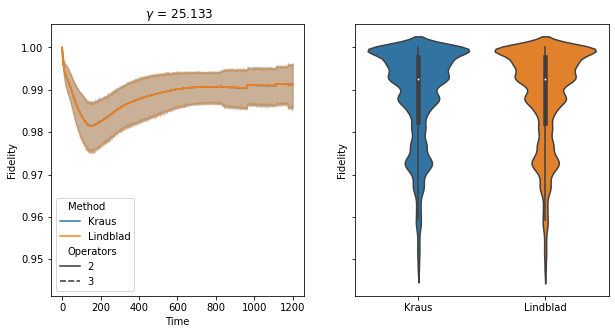

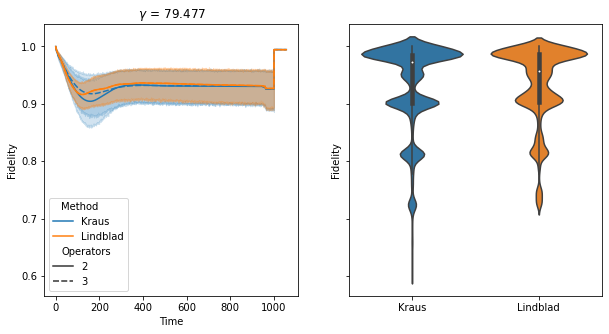

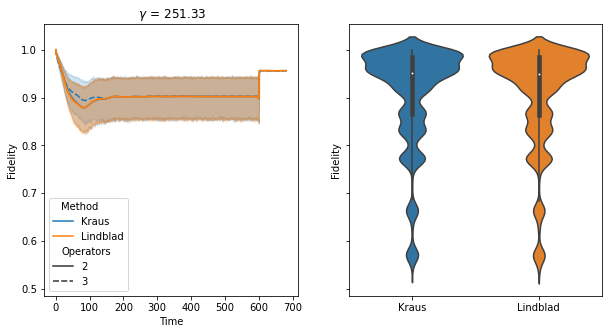

In [136]:
fig, axes = plt.subplots(8, 2, figsize=(10,40))
fig.suptitle('Fidelity for different coupling ')
for i in range(0,8):
    axes[i,0], axes[i,1], = line_and_violin_for_gamma(df, i)
fig.show()

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle(r'Fidelity for $\gamma$ = ' + gammas[1])
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg2, style="Operators")
sns.violinplot(ax=axes[1], data=dfg2, x="Method", y="Fidelity")
sns.move_legend(axes[1], 'center right')
axes[1].set_xlabel('')
axes[1].legend([],[], frameon=False)

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle(r'Fidelity for $\gamma$ = ' + gammas[2])
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg3, style="Operators")
sns.violinplot(ax=axes[1], data=dfg3, x="Method", y="Fidelity")
sns.move_legend(axes[1], 'center right')
axes[1].set_xlabel('')
axes[1].legend([],[], frameon=False)

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle(r'Fidelity for $\gamma$ = ' + gammas[3])
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg4, style="Operators")
sns.violinplot(ax=axes[1], data=dfg4, x="Method", y="Fidelity")
sns.move_legend(axes[1], 'center right')
axes[1].set_xlabel('')
axes[1].legend([],[], frameon=False)

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle(r'Fidelity for $\gamma$ = ' + gammas[4])
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg5, style="Operators")
sns.violinplot(ax=axes[1], data=dfg5, x="Method", y="Fidelity")
sns.move_legend(axes[1], 'center right')
axes[1].set_xlabel('')
axes[1].legend([],[], frameon=False)

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle(r'Fidelity for $\gamma$ = ' + gammas[5])
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg6, style="Operators")
sns.violinplot(ax=axes[1], data=dfg6, x="Method", y="Fidelity")
sns.move_legend(axes[1], 'center right')
axes[1].set_xlabel('')
axes[1].legend([],[], frameon=False)

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle(r'Fidelity for $\gamma$ = ' + gammas[6])
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg7, style="Operators")
sns.violinplot(ax=axes[1], data=dfg7, x="Method", y="Fidelity")
sns.move_legend(axes[1], 'center right')
axes[1].set_xlabel('')
axes[1].legend([],[], frameon=False)

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle(r'Fidelity for $\gamma$ = ' + gammas[7])
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Method", data=dfg8, style="Operators")
sns.violinplot(ax=axes[1], data=dfg8, x="Method", y="Fidelity")
sns.move_legend(axes[1], 'center right')
axes[1].set_xlabel('')
axes[1].legend([],[], frameon=False)

C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\1601846948.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


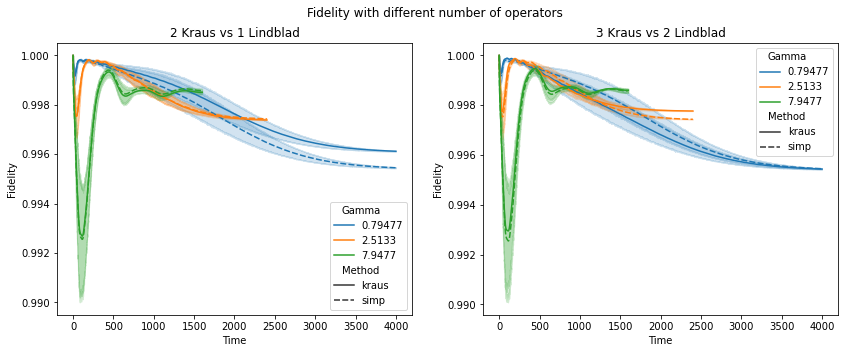

In [113]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,5))
fig.suptitle('Fidelity with different number of operators')
axes[0].set_title('2 Kraus vs 1 Lindblad')
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Gamma", data=dfm2, style="Method")
axes[1].set_title('3 Kraus vs 2 Lindblad')
sns.lineplot(ax=axes[1], x="Time", y="Fidelity", hue="Gamma", data=dfm3, style="Method")
fig.show()

<AxesSubplot:xlabel='Time', ylabel='Fidelity'>

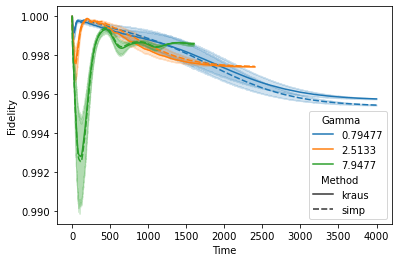

In [30]:
sns.lineplot(x="Time", y="Fidelity", hue="Gamma", data=dfm4, style="Method")

C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\1777221128.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


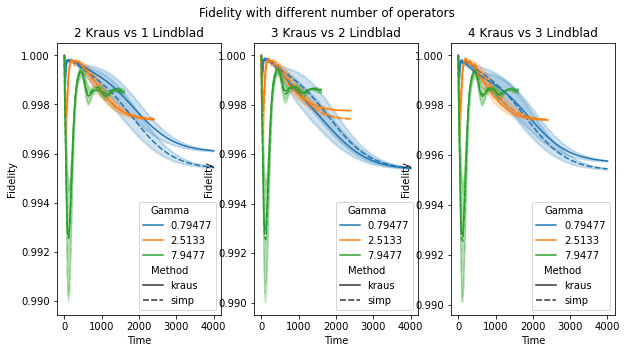

In [34]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,5))
fig.title('Fidelity with different number of operators')
axes[0].set_title('2 Kraus vs 1 Lindblad')
sns.lineplot(ax=axes[0], x="Time", y="Fidelity", hue="Gamma", data=dfm2, style="Method")
axes[1].set_title('3 Kraus vs 2 Lindblad')
sns.lineplot(ax=axes[1], x="Time", y="Fidelity", hue="Gamma", data=dfm3, style="Method")
fig.show()

In [37]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

df = df.rename(columns={"Ops_num": "Operators"})

dfg1 = df[df['Gamma'] == gammas[0]]
dfg2 = df[df['Gamma'] == gammas[1]]
dfg3 = df[df['Gamma'] == gammas[2]]
dfg4 = df[df['Gamma'] == gammas[3]]
dfg5 = df[df['Gamma'] == gammas[4]]
dfg6 = df[df['Gamma'] == gammas[5]]
dfg7 = df[df['Gamma'] == gammas[6]]
dfg8 = df[df['Gamma'] == gammas[7]]

In [38]:
df

,Operators,Gamma,State,Method,Time,Fidelity
0,2,0.079477,State_B1,kraus,0.0,1.000000
1,2,0.079477,State_B1,kraus,1.0,0.677293
2,2,0.079477,State_B1,kraus,2.0,0.729894
3,2,0.079477,State_B1,kraus,3.0,0.727242
4,2,0.079477,State_B1,kraus,4.0,0.727381
...,...,...,...,...,...,...
596,4,251.33,State_D9,simp,596.0,0.985486
597,4,251.33,State_D9,simp,597.0,0.985481
598,4,251.33,State_D9,simp,598.0,0.985476
599,4,251.33,State_D9,simp,599.0,0.985471


C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\3320164055.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


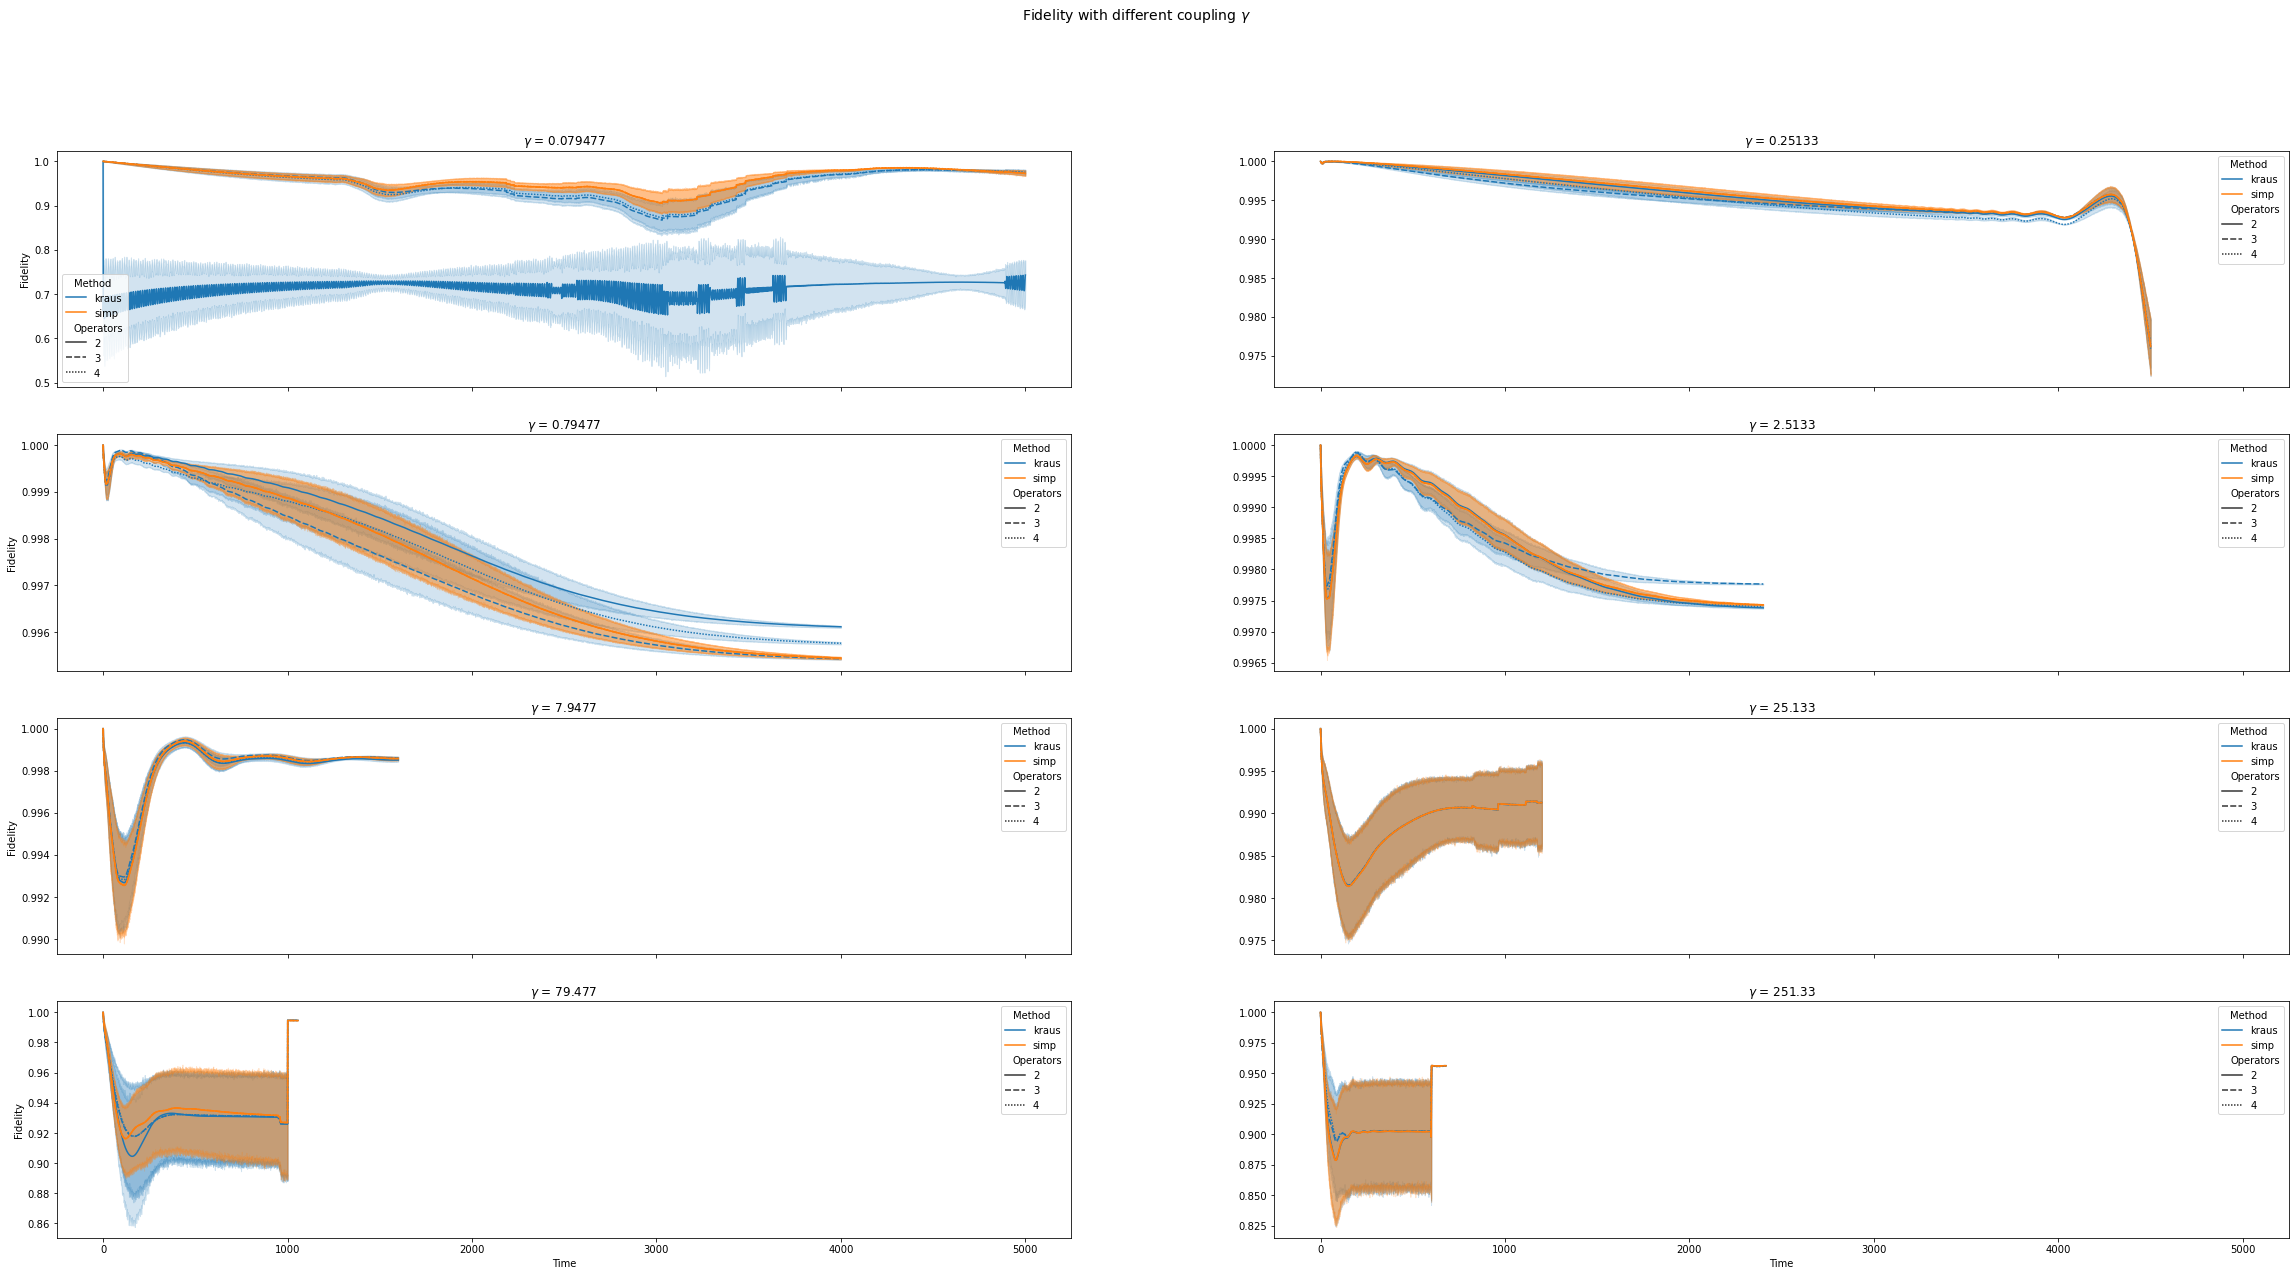

In [69]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(40,20))
fig.suptitle(r'Fidelity with different coupling $\gamma$', fontsize=14)

axes[0,0].set_title(r'$\gamma$ = ' + gammas[0])
sns.lineplot(ax=axes[0,0], x="Time", y="Fidelity", hue="Method", data=dfg1, style="Operators")
axes[0,1].set_title(r'$\gamma$ = ' + gammas[1])
sns.lineplot(ax=axes[0,1], x="Time", y="Fidelity", hue="Method", data=dfg2, style="Operators")
axes[0,1].set_ylabel('')

axes[1,0].set_title(r'$\gamma$ = ' + gammas[2])
sns.lineplot(ax=axes[1,0], x="Time", y="Fidelity", hue="Method", data=dfg3, style="Operators")
axes[1,1].set_title(r'$\gamma$ = ' + gammas[3])
sns.lineplot(ax=axes[1,1], x="Time", y="Fidelity", hue="Method", data=dfg4, style="Operators")
axes[1,1].set_ylabel('')

axes[2,0].set_title(r'$\gamma$ = ' + gammas[4])
sns.lineplot(ax=axes[2,0], x="Time", y="Fidelity", hue="Method", data=dfg5, style="Operators")
axes[2,1].set_title(r'$\gamma$ = ' + gammas[5])
sns.lineplot(ax=axes[2,1], x="Time", y="Fidelity", hue="Method", data=dfg6, style="Operators")
axes[2,1].set_ylabel('')

axes[3,0].set_title(r'$\gamma$ = ' + gammas[6])
sns.lineplot(ax=axes[3,0], x="Time", y="Fidelity", hue="Method", data=dfg7, style="Operators")
axes[3,1].set_title(r'$\gamma$ = ' + gammas[7])
sns.lineplot(ax=axes[3,1], x="Time", y="Fidelity", hue="Method", data=dfg8, style="Operators")
axes[3,1].set_ylabel('')

fig.show()

C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\1092309546.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


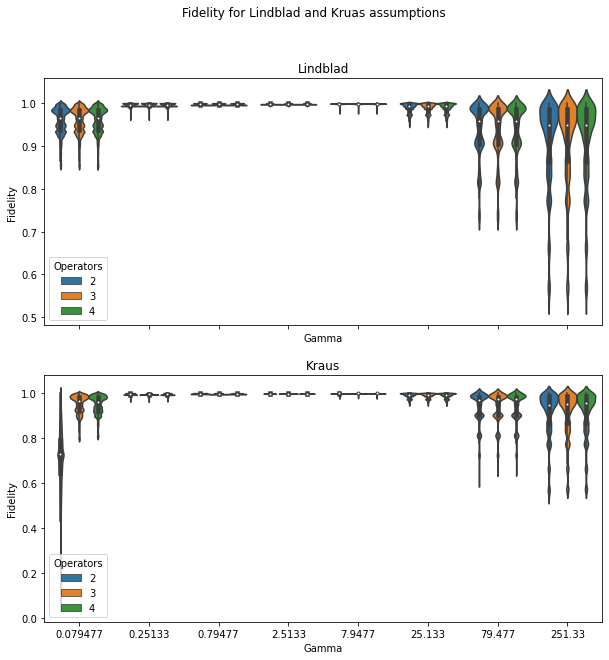

In [70]:
df_simp = df[df['Method']=="simp"]
df_kraus = df[df['Method']=="kraus"]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,10))
fig.suptitle('Fidelity for Lindblad and Kruas assumptions')
axes[0].set_title('Lindblad')
sns.violinplot(ax=axes[0], data=df_simp, x="Gamma", y="Fidelity", hue="Operators")
axes[1].set_title('Kraus')
sns.violinplot(ax=axes[1], data=df_kraus, x="Gamma", y="Fidelity", hue="Operators")
fig.show()

In [47]:
df2

,Ops_num,Gamma,State,Method,Time,Fidelity
0,2,0.079477,State_B1,kraus,0.0,1.000000
1,2,0.079477,State_B1,kraus,1.0,0.677293
2,2,0.079477,State_B1,kraus,2.0,0.729894
3,2,0.079477,State_B1,kraus,3.0,0.727242
4,2,0.079477,State_B1,kraus,4.0,0.727381
...,...,...,...,...,...,...
596,2,251.33,State_D9,simp,596.0,0.985485
597,2,251.33,State_D9,simp,597.0,0.985481
598,2,251.33,State_D9,simp,598.0,0.985476
599,2,251.33,State_D9,simp,599.0,0.985470


In [52]:
df2.replace(to_replace= '0.079477', value = '0.0795', inplace=True )
df2.replace(to_replace= '0.25133', value = '0.2513', inplace=True )
df2.replace(to_replace= '0.79477', value = '0.79478', inplace=True )
df3.replace(to_replace= '0.079477', value = '0.0795', inplace=True )
df3.replace(to_replace= '0.25133', value = '0.2513', inplace=True )
df3.replace(to_replace= '0.79477', value = '0.79478', inplace=True )
df4.replace(to_replace= '0.079477', value = '0.0795', inplace=True )
df4.replace(to_replace= '0.25133', value = '0.2513', inplace=True )
df4.replace(to_replace= '0.79477', value = '0.7948', inplace=True )

C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\681307082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(to_replace= '0.079477', value = '0.0795', inplace=True )
C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\681307082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(to_replace= '0.25133', value = '0.2513', inplace=True )
C:\Users\Zakhar\AppData\Local\Temp\ipykernel_27096\681307082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
fig.suptitle(r'Fidelity from coupling $\gamma$ for different number of operators', fontsize=12)
axes[0].set_title('2 Kraus vs 1 Lindblad')
sns.violinplot(ax=axes[0], data=df2, x="Gamma", y="Fidelity", hue="Method",  split=True)
axes[0].set_xlabel(r'$\gamma$')
axes[0].set_ylim([0.5, 1.05])
axes[1].set_title('3 Kraus vs 2 Lindblad')
sns.violinplot(ax=axes[1], data=df3, x="Gamma", y="Fidelity", hue="Method",  split=True)
axes[1].set_ylabel('')
axes[1].set_xlabel(r'$\gamma$')

#axes[2].set_title('4 Kraus vs 3 Lindblad')
#sns.violinplot(ax=axes[2], data=df4, x="Gamma", y="Fidelity", hue="Method",  split=True)
#axes[2].set_ylabel('')
#axes[2].set_xlabel(r'$\gamma$')
fig.show()

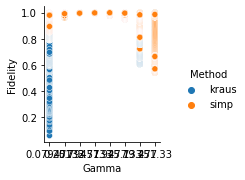

In [64]:
df_overview = df.drop(['State', 'Time'], axis=1)
sns.pairplot(df_overview, hue="Method", y_vars=["Fidelity"], x_vars=["Gamma"])

In [61]:
df_overview['Gamma'] = df_overview['Gamma'].astype(float)

In [63]:
df_overview

,Operators,Gamma,Method,Fidelity
0,2,0.079477,kraus,1.000000
1,2,0.079477,kraus,0.677293
2,2,0.079477,kraus,0.729894
3,2,0.079477,kraus,0.727242
4,2,0.079477,kraus,0.727381
...,...,...,...,...
596,4,251.33,simp,0.985486
597,4,251.33,simp,0.985481
598,4,251.33,simp,0.985476
599,4,251.33,simp,0.985471
